# Perkenalan

**Anggota Kelompok**

1. Fachriansyah Muhammad Haikal (PYTN-KS14-010)
2. Fakhrurrozi (PYTN-KS14-018)
3. Safira Alya Fafaza (PYTN-KS14-017)

**Latar Belakang**
Penyakit gagal jantung adalah kondisi yang serius dan mempengaruhi kualitas hidup serta tingkat kematian pasien. Prediksi yang akurat tentang risiko gagal jantung dapat membantu tenaga medis dalam mengidentifikasi pasien yang rentan dan memungkinkan pengambilan tindakan pencegahan yang tepat.

Dalam hal ini, penggunaan ensemble model menjadi relevan karena dapat memanfaatkan kekuatan berbagai algoritma pembelajaran mesin yang berbeda. Ensemble model menggabungkan hasil prediksi dari beberapa model yang berbeda, seperti KNN, random forest, naive bayes, dan lainnya. Dengan memadukan prediksi dari beberapa model, ensemble model dapat mengurangi bias dan varians yang mungkin ada dalam model tunggal, dan pada akhirnya menghasilkan prediksi yang lebih akurat.

Ensemble model memiliki beberapa variasi, seperti voting ensemble, bagging, dan boosting. Misalnya, pada voting ensemble, prediksi akhir didapatkan dengan memilih hasil prediksi mayoritas dari model yang terlibat. Dengan menggabungkan hasil prediksi dari beberapa model yang berbeda, ensemble model pada dataset Heart Failure Prediction dapat meningkatkan akurasi dan performa prediksi. Dalam konteks medis, hal ini akan membantu dalam mengidentifikasi pasien dengan risiko tinggi gagal jantung, sehingga dapat dilakukan tindakan pencegahan yang tepat untuk meningkatkan prognosis dan kualitas hidup mereka.

**Dataset**

Dataset yang digunakan dalam projek ini adalah Heart Failure yang berisi kelangsungan hidup pasien dengan gagal jantung dari kreatinin serum dan fraksi ejeksi. Dataset ini berjumlah 299 dengan 13 atribut. Pada projek ini atribut yang akan digunakan dan diperlukan untuk membuat sistem prediksi sebanyak 13 antara lain sebagai berikut :
1. age : umur pasien
2. anaemia : apakah ada pengurangan haemoglobin
3. creatinine_phosphokinase : level enzim CPK dalam mcg/L
4. diabetes : apakah pasien punya riwayat diabetes
5. ejection_fraction : persentase darah yang meninggalkan jantung dalam persentasi di setiap kontraksi jantung
6. high_blood_pressure : apakah pasien punya darah tinggi
7. platelets : jumlah platelet di darah dalam kiloplatelets/mL
8. serum_creatinine : level serum creatinine di darah dalam mg/dL
9. serum_sodium : level serum sodium di darah dalam mEq/L
10. sex : apakah pasien pria atau wanita
11. smoking : apakah pasien merokok
12. time : waktu dalam hari untuk follow-up
13. DEATH_EVENT : apakah pasien sudah meninggal saat waktu follow-up


**Objektif**
* menemukan faktor-faktor yang mempengaruhi terjadinya hujan di Australia
* menemukan akurasi prediksi keselamtan pasien dari penyakit jantung menggunakan konsep Classification dengan Ensemble Model
* memberikan wawasan yang dapat bermanfaat bagi masyarakat mengenai penyakit jantung

# Import Library

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from sklearn.metrics import confusion_matrix

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
# jumlah data dan kolom
df.shape

(299, 13)

Dapat diketahui bahwa terdapat 299 baris dan 13 kolom

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


# Data Cleansing

## Mengganti Nama Atribut

In [5]:
df.rename(columns={
    'DEATH_EVENT' : 'death_event'
}, inplace=True)
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


## Mengubah Isi Atribut

### Yes dan No

In [6]:
convert_yes_no = ['anaemia', 'diabetes', 'high_blood_pressure', 'smoking', 'death_event']
value_change = {0: 'No', 1: 'Yes'}
df[convert_yes_no] = df[convert_yes_no].replace(value_change)
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,No,582,No,20,Yes,265000.00,1.9,130,1,No,4,Yes
1,55.0,No,7861,No,38,No,263358.03,1.1,136,1,No,6,Yes
2,65.0,No,146,No,20,No,162000.00,1.3,129,1,Yes,7,Yes
3,50.0,Yes,111,No,20,No,210000.00,1.9,137,1,No,7,Yes
4,65.0,Yes,160,Yes,20,No,327000.00,2.7,116,0,No,8,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,No,61,Yes,38,Yes,155000.00,1.1,143,1,Yes,270,No
295,55.0,No,1820,No,38,No,270000.00,1.2,139,0,No,271,No
296,45.0,No,2060,Yes,60,No,742000.00,0.8,138,0,No,278,No
297,45.0,No,2413,No,38,No,140000.00,1.4,140,1,Yes,280,No


### Woman dan Man

In [7]:
convert_sex = ['sex']
value_change = {0: 'Woman', 1: 'Man'}
df[convert_sex] = df[convert_sex].replace(value_change)
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,No,582,No,20,Yes,265000.00,1.9,130,Man,No,4,Yes
1,55.0,No,7861,No,38,No,263358.03,1.1,136,Man,No,6,Yes
2,65.0,No,146,No,20,No,162000.00,1.3,129,Man,Yes,7,Yes
3,50.0,Yes,111,No,20,No,210000.00,1.9,137,Man,No,7,Yes
4,65.0,Yes,160,Yes,20,No,327000.00,2.7,116,Woman,No,8,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,No,61,Yes,38,Yes,155000.00,1.1,143,Man,Yes,270,No
295,55.0,No,1820,No,38,No,270000.00,1.2,139,Woman,No,271,No
296,45.0,No,2060,Yes,60,No,742000.00,0.8,138,Woman,No,278,No
297,45.0,No,2413,No,38,No,140000.00,1.4,140,Man,Yes,280,No


## Cek Data Kosong

In [8]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
death_event                 0
dtype: int64

Dapat diketahui tidak ada data yang kosong

## Cek Data Duplikat

In [9]:
df.duplicated().sum()

0

Dapat diketahui tidak ada data yang duplikat

## Cek One Value Unique

In [10]:
for column in df.columns:
    print(column, df[column].nunique())

age 47
anaemia 2
creatinine_phosphokinase 208
diabetes 2
ejection_fraction 17
high_blood_pressure 2
platelets 176
serum_creatinine 40
serum_sodium 27
sex 2
smoking 2
time 148
death_event 2


Dapat diketahui bahwa atribut yang ada tidak ditemukan one unique value sehingga tidak perlu ada yang dihapus.

# Eksplorasi Data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    object 
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    object 
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    object 
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    object 
 10  smoking                   299 non-null    object 
 11  time                      299 non-null    int64  
 12  death_event               299 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 30.5+ KB


## Analisa Desktiptif

In [12]:
df.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


## Categorical Features

In [13]:
categorical_features = [feature for feature in df.columns if (
    df[feature].dtypes == "O")]
categorical_features

['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'death_event']

In [14]:
for feature in categorical_features:
    print(
        f"Feature {feature} memiliki unique value {(df[feature].nunique())}")

Feature anaemia memiliki unique value 2
Feature diabetes memiliki unique value 2
Feature high_blood_pressure memiliki unique value 2
Feature sex memiliki unique value 2
Feature smoking memiliki unique value 2
Feature death_event memiliki unique value 2


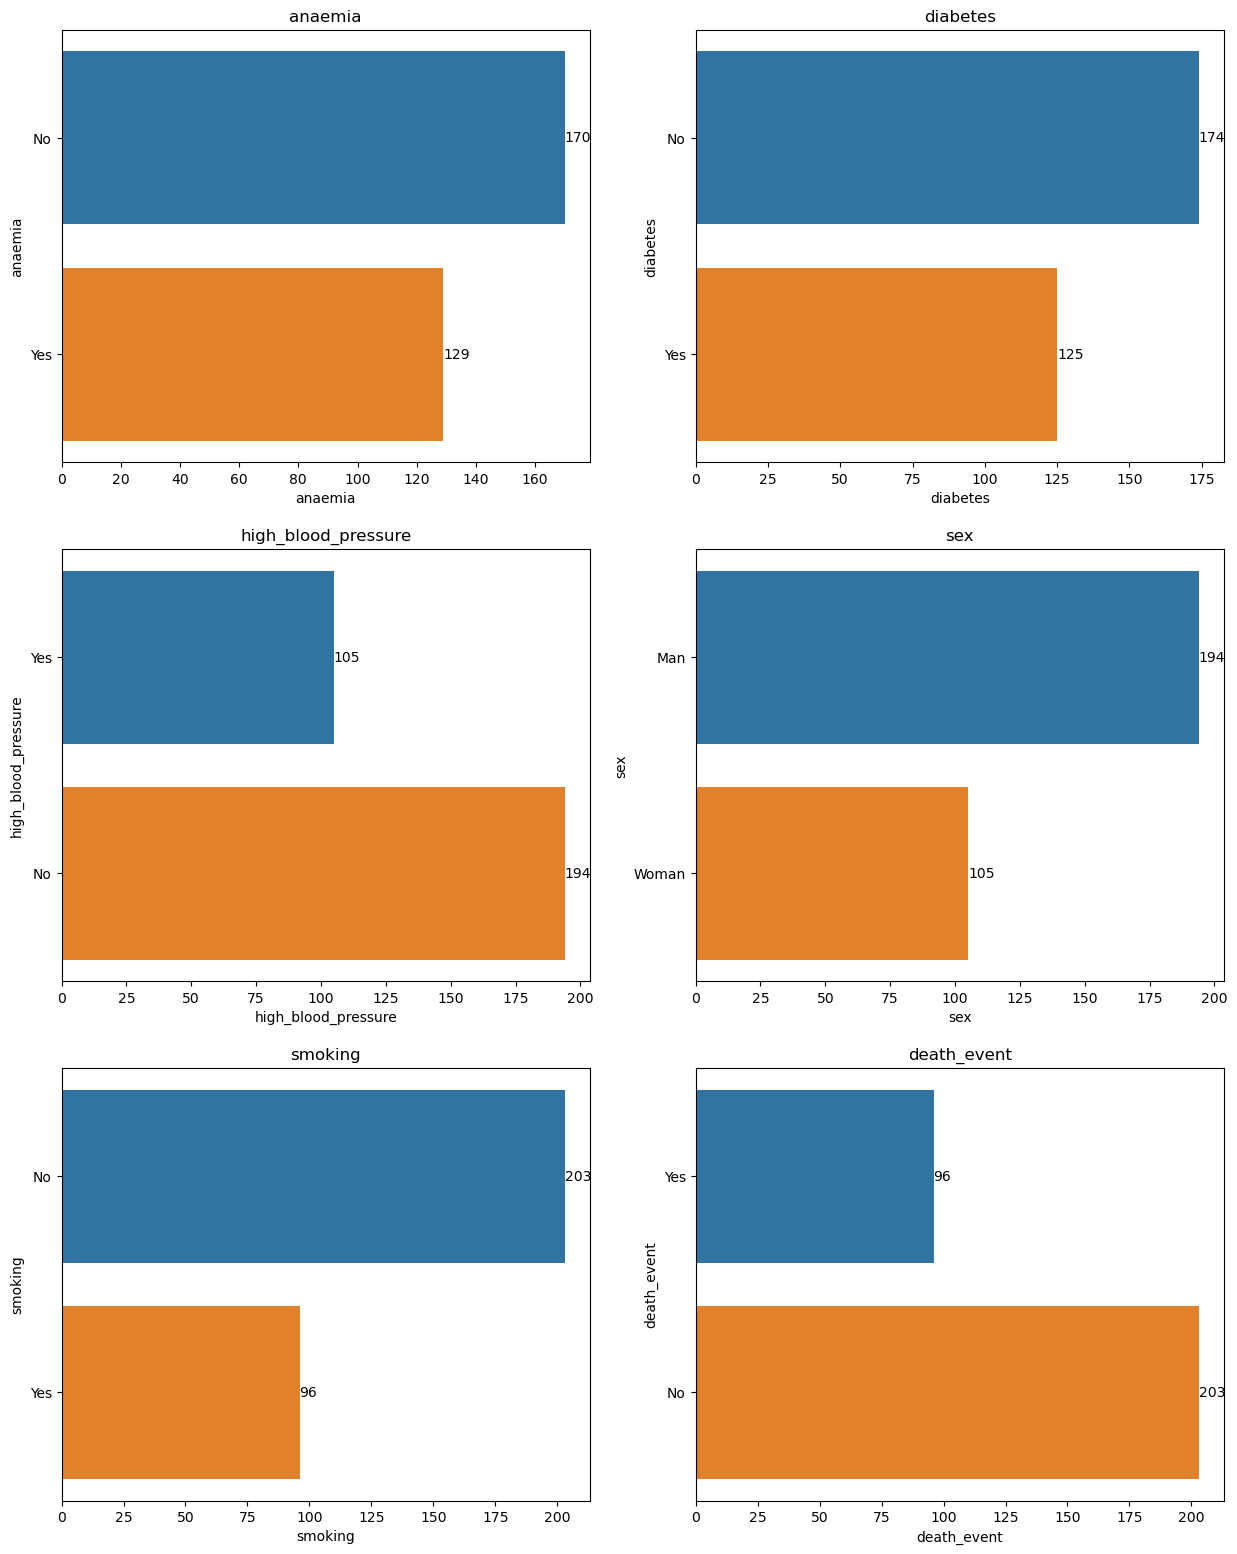

In [15]:
# visualisasi categorical features
plt.figure(figsize=(15, 100), facecolor="white")
plotnumb = 1
for cat in categorical_features:
    ax = plt.subplot(15, 2, plotnumb)
    sns.countplot(y=cat, data=df)
    ax.bar_label(ax.containers[0], fontsize=10)
    plt.xlabel(cat)
    plt.title(cat)
    plotnumb += 1
plt.show()

Dapat diketahui bahwa :
1. Orang yang memiliki penyakit jantung kebanyakan berjenis kelamin laki-laki
2. Orang yang memiliki penyakit jantung kebanyakan tidak meninggal

## Numerical Features

In [16]:
numerical_features = [feature for feature in df.columns if (
    df[feature].dtypes != "O")]
print(numerical_features)
print(f"Terdapat {len(numerical_features)} Numerical Features")

['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
Terdapat 7 Numerical Features


In [17]:
discrete_feature = [
    feature for feature in numerical_features if df[feature].nunique() < 25]
print(discrete_feature)
print(f"Terdapat {len(discrete_feature)} Discrete Numerical Features")

['ejection_fraction']
Terdapat 1 Discrete Numerical Features


In [18]:
continuous_features = [
    feature for feature in numerical_features if feature not in discrete_feature]
print(continuous_features)
print(f"Terdapat {len(continuous_features)} Continuous Feature")

['age', 'creatinine_phosphokinase', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
Terdapat 6 Continuous Feature


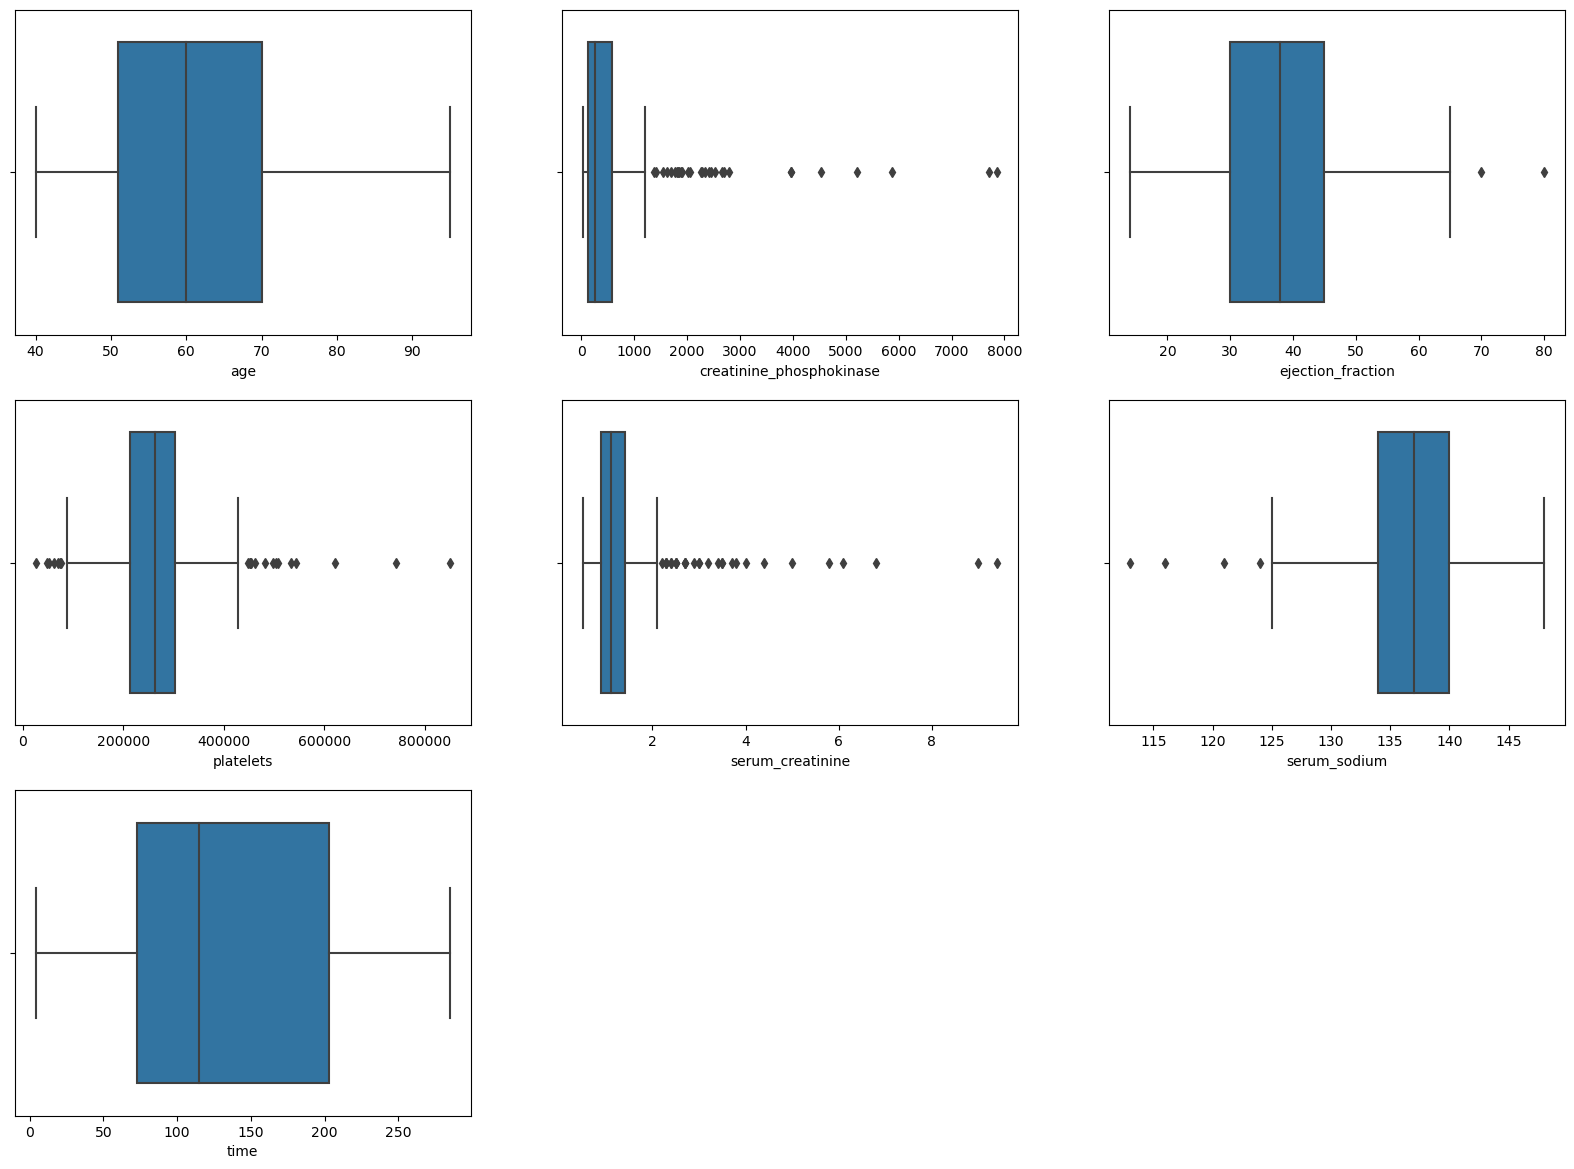

In [19]:
# visualisasi numerical features
plt.figure(figsize=(20, 60), facecolor='white')
num = 1
for numerical_feature in numerical_features:
    ax = plt.subplot(12, 3, num)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    num += 1
plt.show()

In [20]:
def count_outliers_iqr(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    return outliers[column].count()

In [21]:
count_outliers_iqr(df, ['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium'])

creatinine_phosphokinase    29
ejection_fraction            2
platelets                   21
serum_creatinine            29
serum_sodium                 4
dtype: int64

Dapat diketahui bahwa terdapat beberapa data yang outlier pada atribut creatinine_phosphokinase,ejection_fraction, platelets, serum_creatinine, dan serum_sodium

**Handling Data Outliers**

In [22]:
outliers = ['creatinine_phosphokinase', 'ejection_fraction',
            'platelets', 'serum_creatinine', 'serum_sodium']

for i in outliers:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)

    iqr = q3 - q1
    mini = q1 - 1.5 * iqr
    maxi = q3 + 1.5*iqr

    df[i] = np.where(
        df[i] > maxi,
        maxi,
        np.where(
            df[i] < mini,
            mini,
            df[i]
        )
    )

In [23]:
count_outliers_iqr(df, ['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium'])

creatinine_phosphokinase    0
ejection_fraction           0
platelets                   0
serum_creatinine            0
serum_sodium                0
dtype: int64

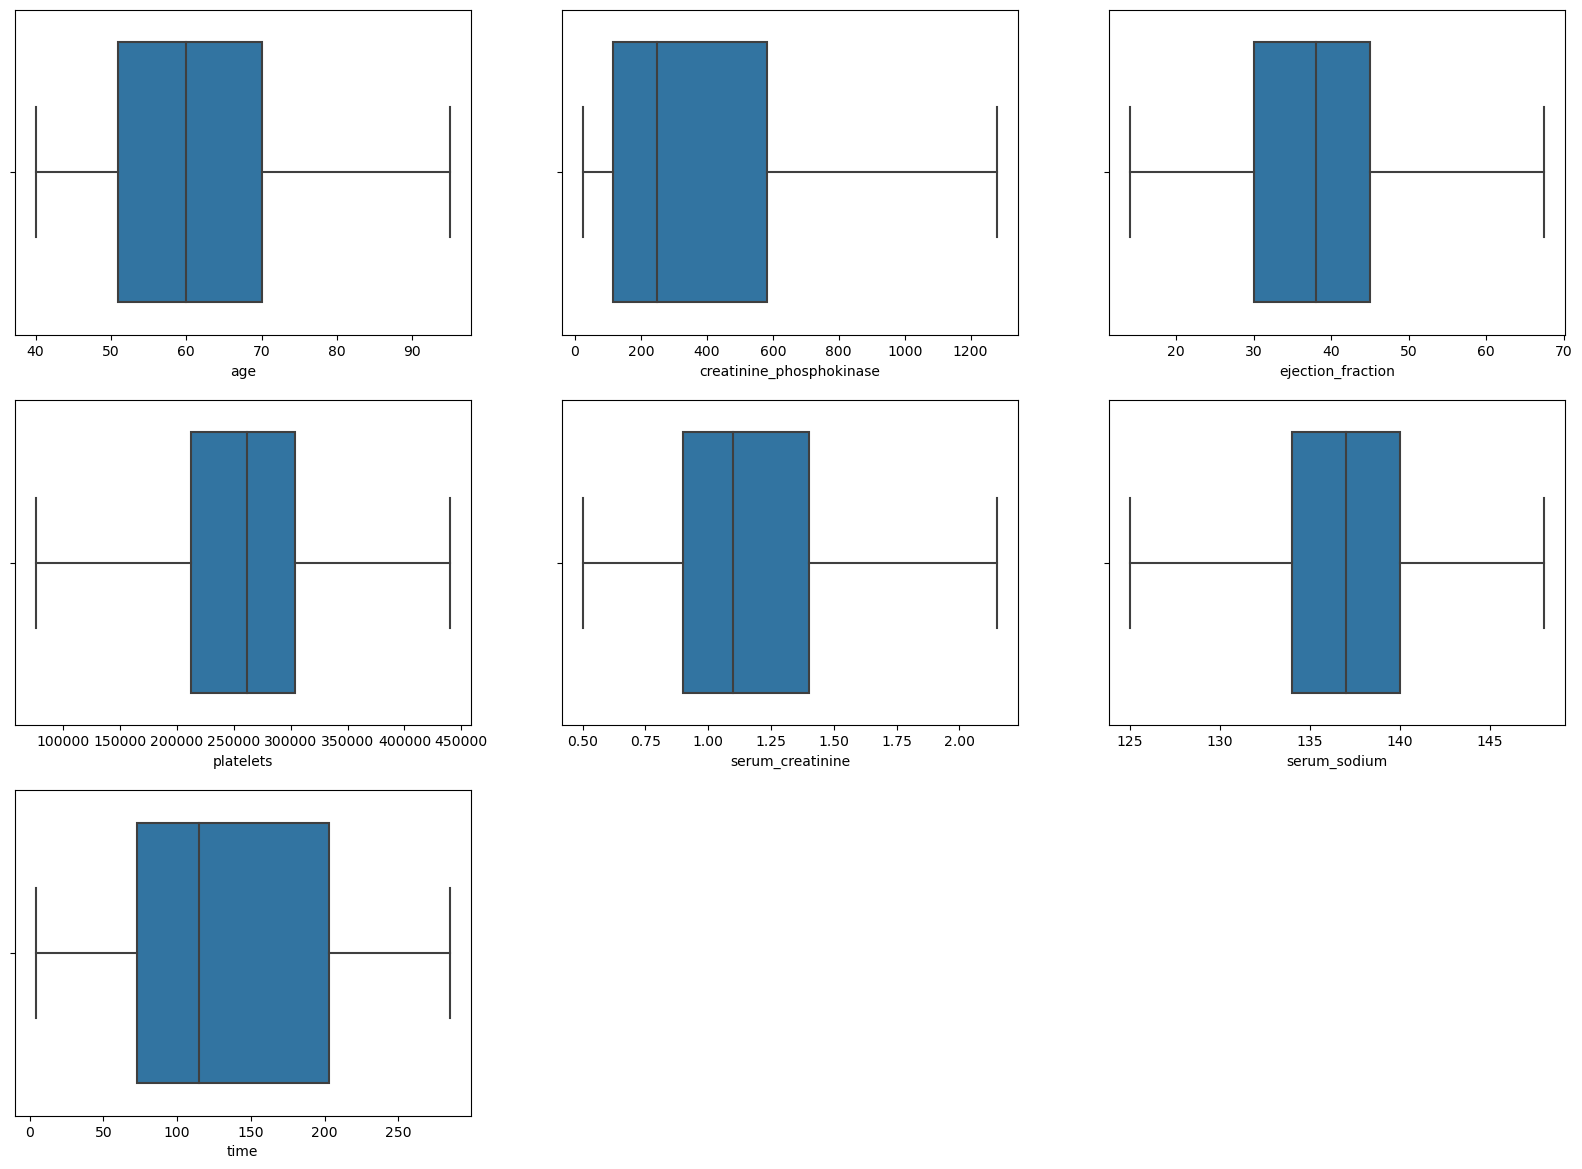

In [24]:
# visualisasi numerical features
plt.figure(figsize=(20, 60), facecolor='white')
num = 1
for numerical_feature in numerical_features:
    ax = plt.subplot(12, 3, num)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    num += 1
plt.show()

## Analisis age vs death_event

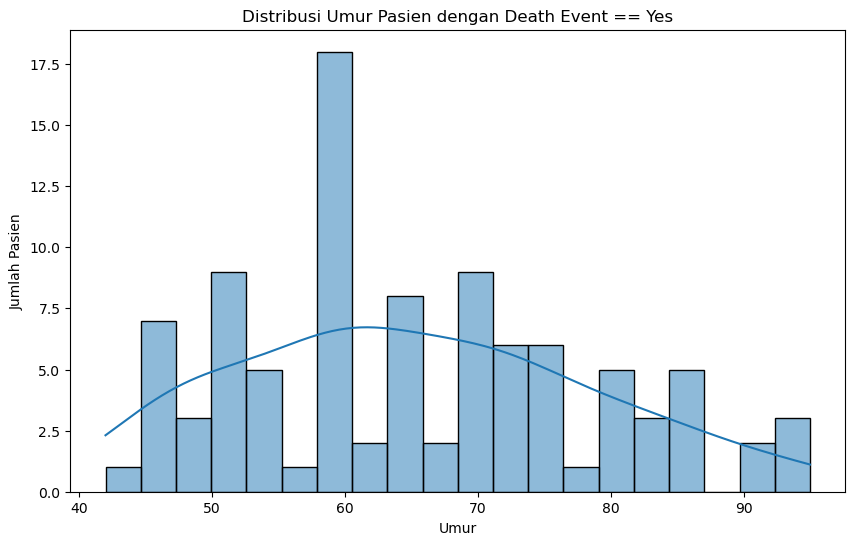

In [25]:
death_event_1 = df[df['death_event'] == 'Yes']

plt.figure(figsize=(10, 6))
sns.histplot(data=death_event_1, x='age', kde=True, bins=20)
plt.title('Distribusi Umur Pasien dengan Death Event == Yes')
plt.xlabel('Umur')
plt.ylabel('Jumlah Pasien')

plt.show()

Dapat diketahui bahwa pasien yang meninggal karena penyakit jantung paling banyak berumur 60-an tahun

## Analisis anaemia vs death_event

<AxesSubplot:ylabel='death_event,anaemia'>

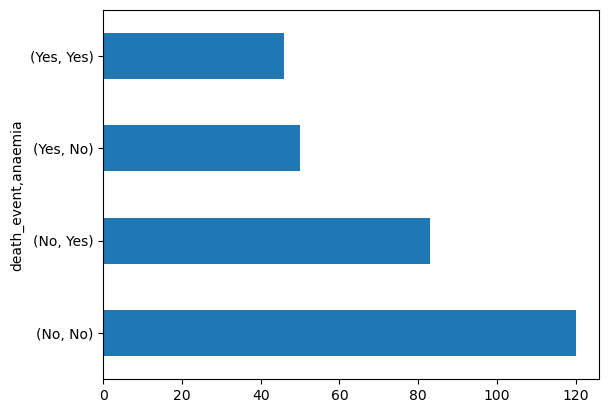

In [26]:
df.groupby('death_event')['anaemia'].value_counts().plot(kind='barh')

Dapat diketahui bahwa lebih banyak pasien yang tidak meninggal dan tidak memiliki riwayat anemia

## Analisis diabetes vs death_event

<AxesSubplot:ylabel='death_event,diabetes'>

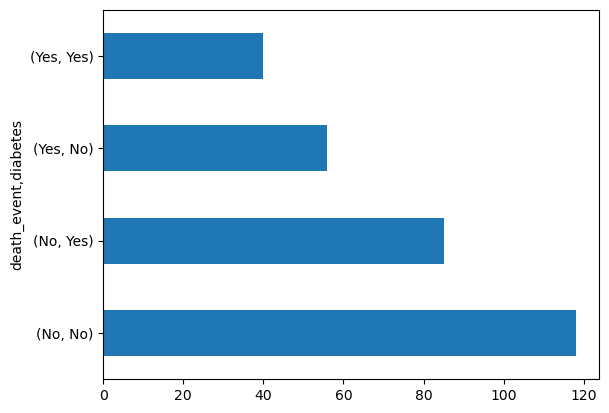

In [27]:
df.groupby('death_event')['diabetes'].value_counts().plot(kind='barh')

Dapat diketahui bahwa lebih banyak pasien yang tidak meninggal dan tidak memiliki riwayat diabetes

## Analisis high_blood_pressure vs death_event

<AxesSubplot:ylabel='death_event,high_blood_pressure'>

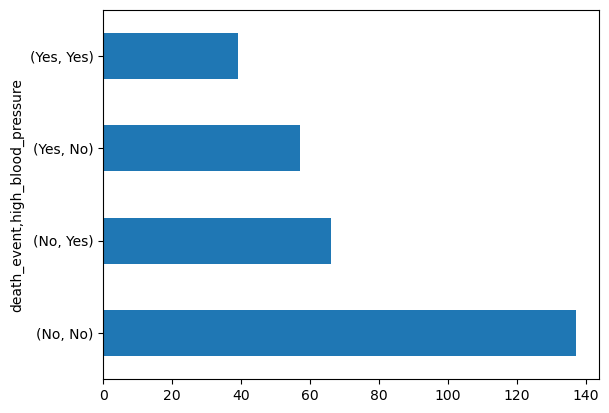

In [28]:
df.groupby('death_event')['high_blood_pressure'].value_counts().plot(kind='barh')

Dapat diketahui bahwa lebih banyak pasien yang tidak meninggal dan tidak memiliki riwayat tekanan darah tinggi

## Analisis smoking vs death_event

<AxesSubplot:ylabel='death_event,smoking'>

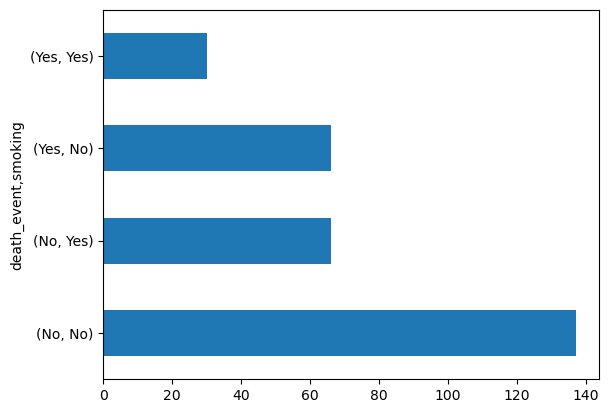

In [29]:
df.groupby('death_event')['smoking'].value_counts().plot(kind='barh')

Dapat diketahui bahwa lebih banyak pasien yang tidak meninggal dan tidak merokok

## Analisis serum_cretinin dan serum_sodium vs death_event

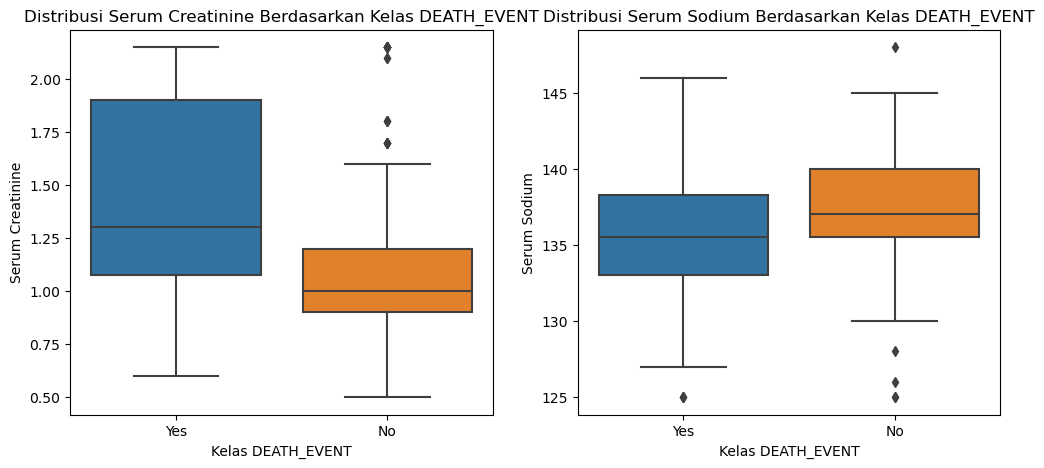

In [30]:
fig, axs = plt.subplots(ncols=2, figsize=(12,5))

sns.boxplot(data=df, x='death_event', y='serum_creatinine', ax=axs[0])
axs[0].set_title('Distribusi Serum Creatinine Berdasarkan Kelas DEATH_EVENT')
axs[0].set_xlabel('Kelas DEATH_EVENT')
axs[0].set_ylabel('Serum Creatinine')

sns.boxplot(data=df, x='death_event', y='serum_sodium', ax=axs[1])
axs[1].set_title('Distribusi Serum Sodium Berdasarkan Kelas DEATH_EVENT')
axs[1].set_xlabel('Kelas DEATH_EVENT')
axs[1].set_ylabel('Serum Sodium')

plt.show()

Dapat diketahui bahwa :
1. Pasien yang meninggal biasanya memiliki kadar kreatinin lebih tinggi 
2. Pasien yang meninggal biasanya memiliki kadar sodium yang lebih rendah

# Data Pre-processing

## Encode

In [31]:
# Ubah kedalam bentuk numerik
encoded_data = LabelEncoder()

for cat in categorical_features:
        if cat in df.columns.values:
            df[cat] = encoded_data.fit_transform(df[cat])

df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,0,582.00,0,20.0,1,265000.00,1.90,130.0,0,0,4,1
1,55.0,0,1280.25,0,38.0,0,263358.03,1.10,136.0,0,0,6,1
2,65.0,0,146.00,0,20.0,0,162000.00,1.30,129.0,0,1,7,1
3,50.0,1,111.00,0,20.0,0,210000.00,1.90,137.0,0,0,7,1
4,65.0,1,160.00,1,20.0,0,327000.00,2.15,125.0,1,0,8,1


## Korelasi Data

<AxesSubplot:>

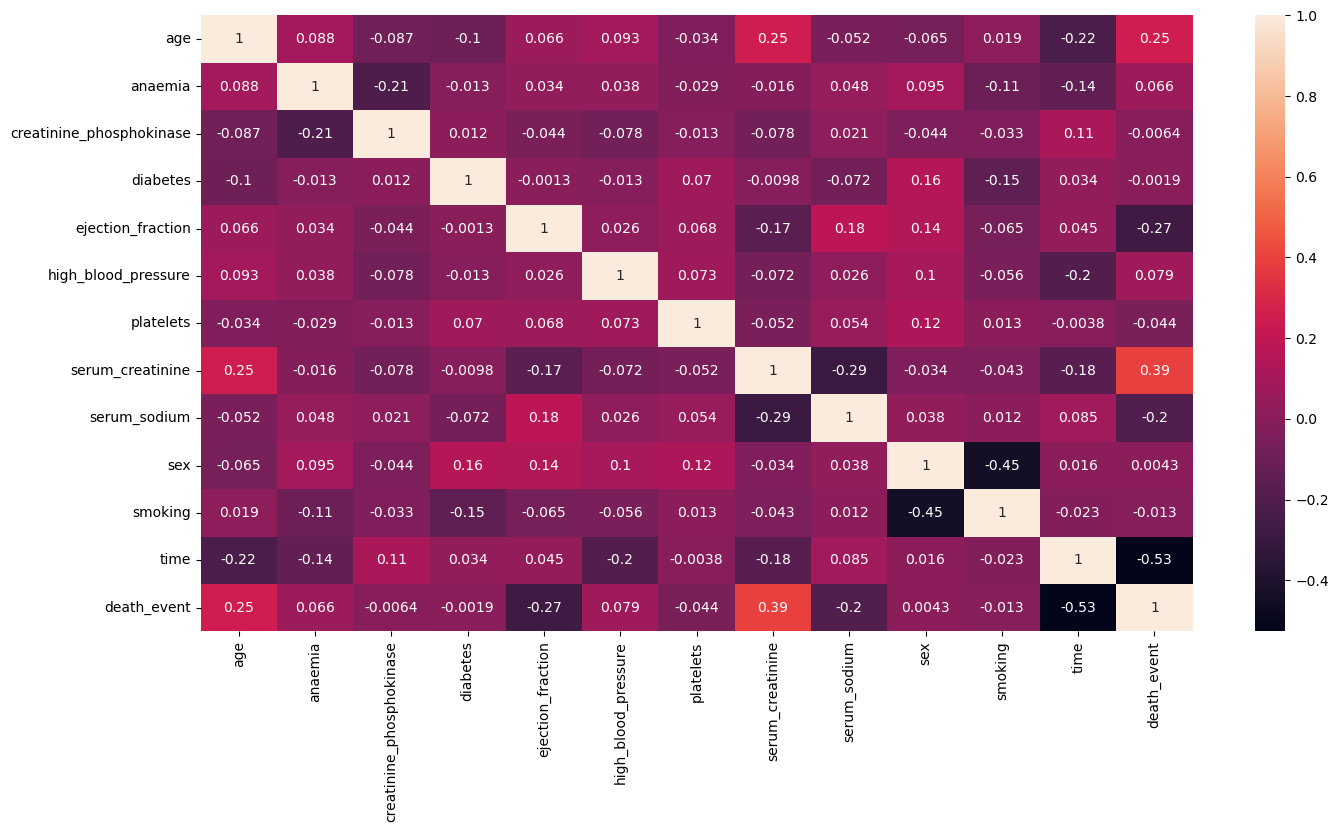

In [32]:
# Cek korelasi
corr_mat = df.corr()
fig = plt.figure(figsize=(16, 8))
sns.heatmap(corr_mat, annot=True)

# Pendefinisian Model

## Train-Test-Split

Menentukan variabel bebas dan variabel terikat :

x = variabel bebas = age, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction, high_blood_pressure, platelets, serum_creatinine, serum_sodium, sex, smoking dan time	
y = variabel terikat = death_event

In [33]:
X = df.drop('death_event', axis=1)
y = df['death_event']

Membagi data menjadi training dan testing dengan training sebesar 70% dan testing sebesar 30%

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Pelatihan Model

## Handle Imbalanced Data

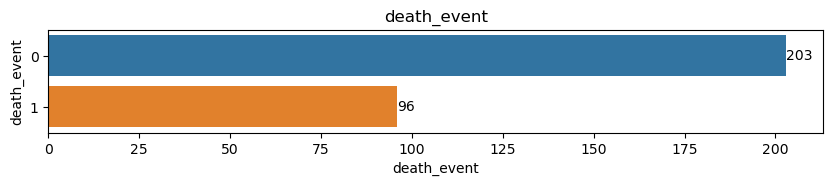

In [35]:
plt.figure(figsize=(10, 4), facecolor="white")
plt.subplots_adjust(hspace=1)

ax = plt.subplot(2, 1, 1)
sns.countplot(y='death_event', data=df)
ax.bar_label(ax.containers[0])
plt.xlabel('death_event')
plt.title('death_event')

plt.show()

Dapat diketahui bahwa kedua grafik diatas masih tergolong tidak balance atau imbalanced karena perbedaannya terlalu jauh. Karena data tergolong imbalanced perlu dilakukan balancing data. Pada kasus ini menggunakan oversampling, yaitu menyeimbangkan dataset dengan menambah jumlah sampel pada kelas minoritas sehingga distribusi kelas menjadi lebih seimbang.

In [36]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

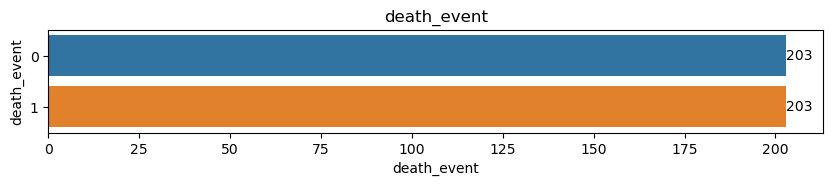

In [37]:
plt.figure(figsize=(10, 4), facecolor="white")
plt.subplots_adjust(hspace=1)

ax = plt.subplot(2, 1, 1)
sns.countplot(y=y_resampled, data=df)
ax.bar_label(ax.containers[0])
plt.xlabel('death_event')
plt.title('death_event')

plt.show()

In [38]:
# melakukan split pada X_resampled dan y_resampled
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3)

In [39]:
naiveBayes = GaussianNB()
knn = KNeighborsClassifier()
randomForest = RandomForestClassifier()
logReg = LogisticRegression()

## Ensemble Model

In [40]:
# Inisialisasi Voting Classifier
voting = VotingClassifier(estimators=[
    ('naive_bayes', naiveBayes),
    ('knn', knn),
    ('random_forest', randomForest),
    ('logistic_regression', logReg)
])

# Melatih model dengan data training
voting.fit(X_train, y_train)

# Mengevaluasi model dengan data testing
score = voting.score(X_test, y_test)

# Evaluasi Model

In [41]:
print('Akurasi model Voting Classifier:', score)

Akurasi model Voting Classifier: 0.8442622950819673


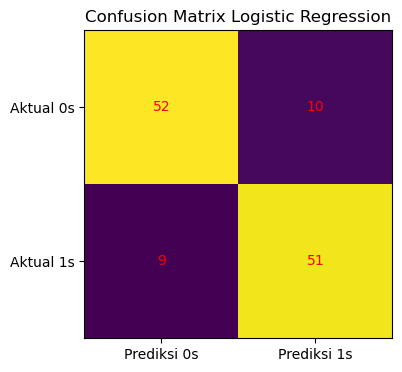

In [42]:
voting_prediction = voting.predict(X_test)

cm_voting = confusion_matrix(y_test, voting_prediction)
fig,ax = plt.subplots(figsize=(4,4))
plt.title("Confusion Matrix Logistic Regression")

ax.imshow(cm_voting)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels = ('Prediksi 0s','Prediksi 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels = ('Aktual 0s','Aktual 1s'))

for i in range(2):
    for j in range(2):
        ax.text(j,i,cm_voting[i,j],ha='center',va='center',color='red')

plt.show()

# Model Inference

In [43]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'death_event'],
      dtype='object')

In [44]:
df_new = pd.DataFrame({
    'age': [61, 58, 47],
    'anaemia': [0, 1, 1],
    'creatinine_phosphokinase': [200, 400, 500],
    'diabetes': [0, 0, 1],
    'ejection_fraction': [32, 45, 39],
    'high_blood_pressure': [1, 0, 1],
    'platelets': [217000, 318000, 265000],
    'serum_creatinine': [0.9, 1, 1.2],
    'serum_sodium': [134, 137, 139],
    'sex': [1, 1, 0],
    'smoking': [1, 0, 0],
    'time': [2, 500, 150]
})

In [45]:
df_new2 = pd.DataFrame({
    'age': [X_test.iloc[0,0], X_test.iloc[3,0], X_test.iloc[4,0]],
    'anaemia': [X_test.iloc[0,1], X_test.iloc[3,1], X_test.iloc[4,1]],
    'creatinine_phosphokinase': [X_test.iloc[0,2], X_test.iloc[3,2], X_test.iloc[4,2]],
    'diabetes': [X_test.iloc[0,3], X_test.iloc[3,3], X_test.iloc[4,3]],
    'ejection_fraction': [X_test.iloc[0,4], X_test.iloc[3,4], X_test.iloc[4,4]],
    'high_blood_pressure': [X_test.iloc[0,5], X_test.iloc[3,5], X_test.iloc[4,5]],
    'platelets': [X_test.iloc[0,6], X_test.iloc[3,6], X_test.iloc[4,6]],
    'serum_creatinine': [X_test.iloc[0,7], X_test.iloc[3,7], X_test.iloc[4,7]],
    'serum_sodium': [X_test.iloc[0,8], X_test.iloc[3,8], X_test.iloc[4,8]],
    'sex': [X_test.iloc[0,9], X_test.iloc[3,9], X_test.iloc[4,9]],
    'smoking': [X_test.iloc[0,10], X_test.iloc[3,10], X_test.iloc[4,10]],
    'time': [X_test.iloc[0,11], X_test.iloc[3,11], X_test.iloc[4,11]]
})

In [46]:
df_new.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,61,0,200,0,32,1,217000,0.9,134,1,1,2
1,58,1,400,0,45,0,318000,1.0,137,1,0,500
2,47,1,500,1,39,1,265000,1.2,139,0,0,150


In [47]:
df_new2.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,68.753461,0,751.45421,0,28.517084,0,335565.095888,1.821745,139.811635,0,0,89
1,60.000000,0,1280.25000,1,25.000000,0,365000.000000,2.100000,144.000000,1,0,172
2,68.000000,1,1021.00000,1,35.000000,0,271000.000000,1.100000,134.000000,0,0,197


In [48]:
voting_prediction_new = voting.predict(df_new)
voting_prediction_new

array([1, 0, 0])

In [49]:
voting_prediction_new2 = voting.predict(df_new2)
voting_prediction_new2

array([1, 0, 0])

# Pengambilan Kesimpulan

**Faktor-Faktor** 

Dapat diketahui faktor-faktor yang mempengaruhi keselamatan pasien dengan riwayat penyakit jantung adalah sebagai berikut :

1. age : umur pasien
2. anaemia : apakah ada pengurangan haemoglobin
3. creatinine_phosphokinase : level enzim CPK dalam mcg/L
4. diabetes : apakah pasien punya riwayat diabetes
5. ejection_fraction : persentase darah yang meninggalkan jantung dalam persentasi di setiap kontraksi jantung
6. high_blood_pressure : apakah pasien punya darah tinggi
7. platelets : jumlah platelet di darah dalam kiloplatelets/mL
8. serum_creatinine : level serum creatinine di darah dalam mg/dL
9. serum_sodium : level serum sodium di darah dalam mEq/L
10. sex : apakah pasien pria atau wanita
11. smoking : apakah pasien merokok
12. time : waktu dalam hari untuk follow-up
13. DEATH_EVENT : apakah pasien sudah meninggal saat waktu follow-up
    
**Akurasi** 

Berdasarkan pelatihan ensemble model yang telah dilakukan dapat diperoleh akurasi dari model Voting dari keempat model(Naive Bayes, KNN, Random Forest, dan Logistic Regression) adalah sebesar 84.42%

**Wawasan**

Insight yang ditemukan dalam prediksi keselamatan pasien dengan riwayat penyakit jantung adalah sebagai berikut :
1. Dapat diketahui bahwa pasien yang meninggal karena penyakit jantung paling banyak berumur 60-an tahun
2. Dapat diketahui bahwa pasien yang memiliki penyakit jantung kebanyakan berjenis kelamin laki-laki
3. Dapat diketahui bahwa pasien yang meninggal biasanya memiliki kadar kreatinin lebih tinggi dan/atau kadar sodium yang lebih rendah 